In [410]:
filename0 = '/Users/bowenchen/Documents/electron/Electron code/Constants.fits'
hdu_c = fits.open(filename0)
M = hdu_c[0].header['M']
T = hdu_c[0].header['Temp']

print(M)


1e+21


In [412]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os

# List of file names
file_list = ['merged_output_x100.fits','merged_output_x105.fits','merged_output_x110.fits','merged_output_x125.fits','merged_output_x150.fits','merged_output_x175.fits','merged_output_x200.fits','merged_output_x225.fits','merged_output_x250.fits','merged_output_x275.fits','merged_output_x300.fits','merged_output_x325.fits','merged_output_x350.fits','merged_output_x375.fits','merged_output_x400.fits','merged_output_x425.fits','merged_output_x450.fits','merged_output_x475.fits','merged_output_x500.fits','merged_output_x525.fits','merged_output_x550.fits','merged_output_x575.fits','merged_output_x600.fits','merged_output_x650.fits','merged_output_x700.fits','merged_output_x750.fits','merged_output_x800.fits','merged_output_x850.fits','merged_output_x900.fits','merged_output_x950.fits','merged_output_x1000.fits','merged_output_x1025.fits','merged_output_x1050.fits','merged_output_x1075.fits','merged_output_x1100.fits','merged_output_x1125.fits','merged_output_x1150.fits','merged_output_x1175.fits','merged_output_x1200.fits','merged_output_x1300.fits','merged_output_x1400.fits','merged_output_x1500.fits','merged_output_x1600.fits','merged_output_x1700.fits','merged_output_x1800.fits']
directory = '/Users/bowenchen/Documents/electron/'
directory = '/Users/bowenchen/Documents/electron/'
# List to store summed values and corresponding x values
sum_values = []
x_values = []

# Value of domega
domega = 0.1*T


In [413]:
import numpy as np
from astropy.io import fits

def extract_extension_data(filename):
    """
    Extracts data from the primary HDU and extensions of a FITS file and returns 
    it as a NumPy array, along with a list of 'OMEGA' values from the headers.
    
    Parameters:
    - filename (str): Path to the FITS file.
    
    Returns:
    - np.array(extension_data): NumPy array containing the data from the HDUs.
    - omega_list (list): List of OMEGA values from the headers.
    """
    extension_data = []
    omega_list = []

    # Open the FITS file and load the data
    with fits.open(filename) as hdul:
        # Store Primary HDU data
        if hdul[0].data is not None:
            primary_data = hdul[0].data.copy()  # Copy the data into a NumPy array
            omega = hdul[0].header.get('OMEGA', None)  # Use .get() to avoid KeyError if 'OMEGA' is missing
            extension_data.append(primary_data)
            omega_list.append(omega)

        # Loop through the extensions and store data
        for i in range(1, len(hdul)):
            if hdul[i].data is not None:
                ext_data = hdul[i].data.copy()  # Copy the data into a NumPy array
                omega = hdul[i].header.get('OMEGA', None)
                extension_data.append(ext_data)
                omega_list.append(omega)

    # Return the data as a NumPy array and the list of OMEGA values
    return np.array(extension_data), omega_list




In [414]:
output_x_list = []

# Loop over the file_list to extract data from each file
for filename in file_list:
    filepath = os.path.join(directory, filename)
    extension_data_array, omega_list = extract_extension_data(filepath)
    output_x_list.append(extension_data_array)
    
    

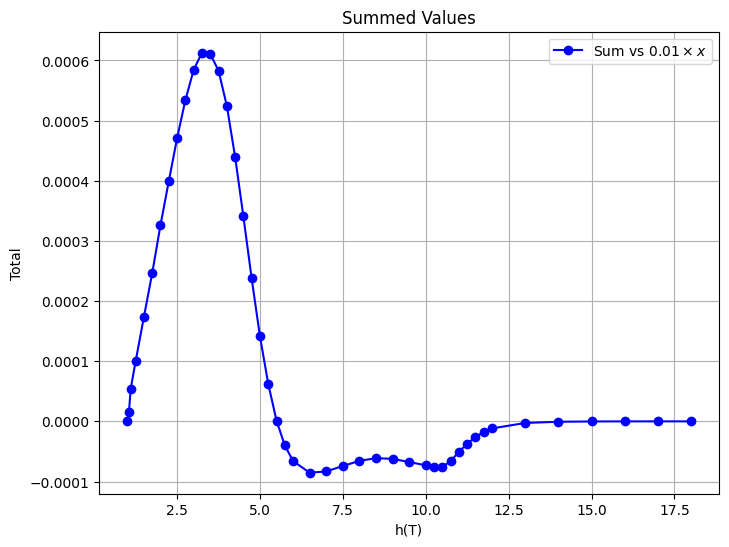

In [418]:
sum_values = []
x_values = []

# Loop through the extracted data and calculate the sum
for idx, data_array in enumerate(output_x_list):
    # Compute the sum over all axes (0, 1, 2, 3, 4) if applicable
    summed_value = np.sum(data_array[:,:,:,:,:], axis=None) * domega  # axis=None sums over all axes

    # Extract the x value from the filename
    x = int(file_list[idx].split('_x')[1].split('.fits')[0])

    # Store the summed value and corresponding x value (scaled by 0.01)
    sum_values.append(summed_value)
    x_values.append(0.01 * x)


# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(x_values, sum_values, marker='o', linestyle='-', color='b', label=r'Sum vs $0.01 \times x$')
plt.xlabel('h(T)')
plt.ylabel('Total')
#plt.xscale('log')
#plt.ylim(1e-10, 1e-3)
plt.title('Summed Values')
plt.grid(True)
plt.legend()
plt.show()

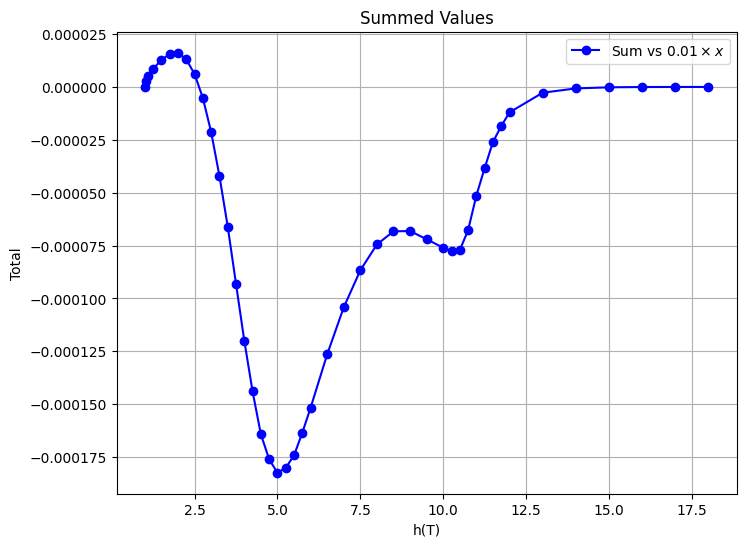

In [417]:
sum_values = []
x_values = []

# Loop through the extracted data and calculate the sum
for idx, data_array in enumerate(output_x_list):
    # Compute the sum over all axes (0, 1, 2, 3, 4) if applicable
    summed_value = np.sum(data_array[:,:,:,:,:8], axis=None) * domega  # axis=None sums over all axes

    # Extract the x value from the filename
    x = int(file_list[idx].split('_x')[1].split('.fits')[0])

    # Store the summed value and corresponding x value (scaled by 0.01)
    sum_values.append(summed_value)
    x_values.append(0.01 * x)


# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(x_values, sum_values, marker='o', linestyle='-', color='b', label=r'Sum vs $0.01 \times x$')
plt.xlabel('h(T)')
plt.ylabel('Total')
#plt.xscale('log')
#plt.ylim(1e-10, 1e-3)
plt.title('Summed Values')
plt.grid(True)
plt.legend()
plt.show()

/var/folders/7b/blysj88j1h171pc8rpnf6d240000gn/T/ipykernel_68017/36740178.py:15: RuntimeWarning: invalid value encountered in divide
  normalized_contributions_per_kabs = contributions_per_kabs/np.sum(np.abs(contributions_per_kabs))


(10, 41)


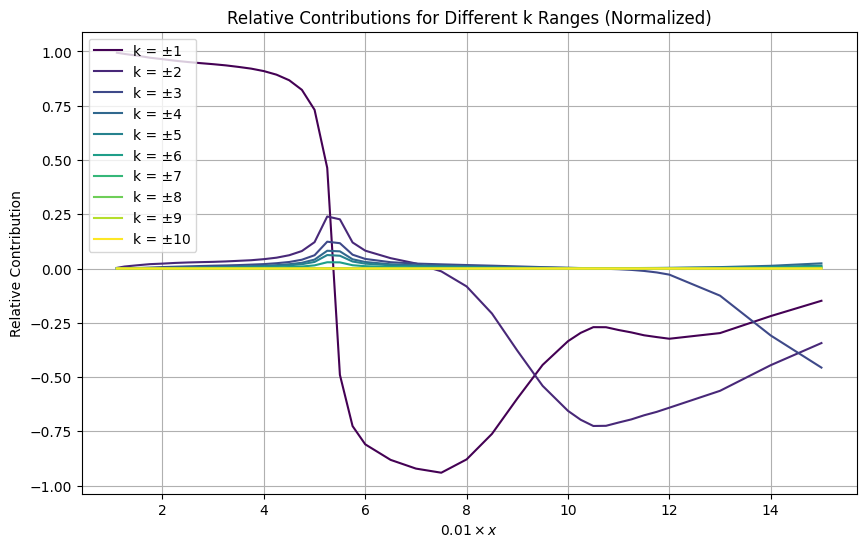

In [387]:
import numpy as np
import matplotlib.pyplot as plt

# List to store the normalized contributions for each file (x value)
normalized_contributions = []

# List of k values, skipping k=0
k_range = list(range(-10, 0)) + list(range(1, 11))

# Loop through each file (x value)
for idx, data_array in enumerate(output_x_list):  # Iterate over the 41 files in output_x_list
    contributions_per_kabs = np.zeros(10)
    for k_limit in range(0, 10):
        contributions_per_kabs[k_limit] = (np.sum(data_array[:, 9-k_limit, :, :, :], axis=None)+np.sum(data_array[:, 10+k_limit, :, :, :], axis=None))* domega
    normalized_contributions_per_kabs = contributions_per_kabs/np.sum(np.abs(contributions_per_kabs))
    normalized_contributions.append(normalized_contributions_per_kabs)
normalized_contributions = np.array(normalized_contributions).T

print(normalized_contributions.shape)
# Now plotting the results
x_values = [0.01 * int(file.split('_x')[1].split('.fits')[0]) for file in file_list]  # Extract x values

# Colors for shading between lines
colors = plt.cm.viridis(np.linspace(0, 1, 10))  # Use colormap for 10 different colors

plt.figure(figsize=(10, 6))

# Plot each normalized line and shade between them
for i in range(1, 11):  # Loop through the 10 cumulative contribution ranges
    if i == 1:
        # Plot for the first k range (±1)
        plt.plot(x_values, normalized_contributions[i - 1], label=f'k = ±{i}', color=colors[i - 1])
    else:
        # Plot for the remaining k ranges and shade the area between them
        plt.plot(x_values, normalized_contributions[i - 1], label=f'k = ±{i}', color=colors[i - 1])

plt.xlabel(r'$0.01 \times x$')
plt.ylabel('Relative Contribution')
plt.title('Relative Contributions for Different k Ranges (Normalized)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


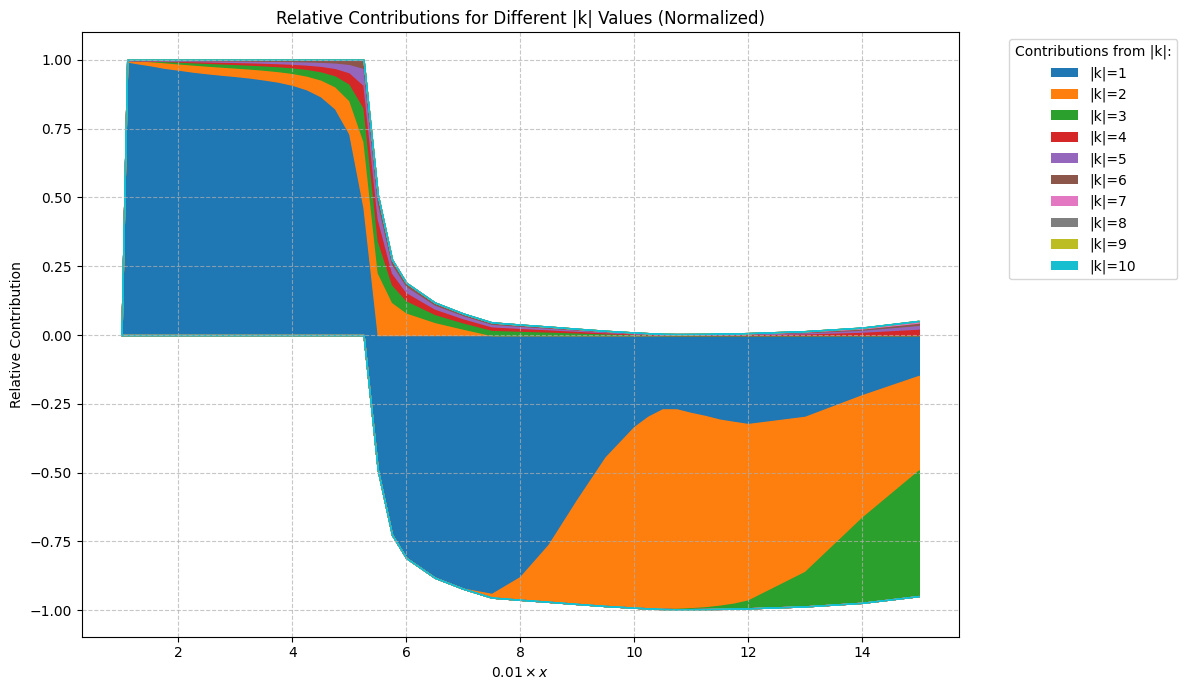

In [381]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming normalized_contributions is of shape (10, N), where N is the number of x_values
# We'll focus on |k| from 1 to 10
kabs_range = np.arange(1, 11)  # |k| = 1 to 10

# Use the tab10 colormap for 10 distinct colors
colors = plt.cm.tab10(np.linspace(0, 1, len(kabs_range)))

# Convert x_values to a NumPy array for easier indexing
x_values = np.array([0.01 * int(file.split('_x')[1].split('.fits')[0]) for file in file_list])

plt.figure(figsize=(12, 7))

# Initialize cumulative arrays for positive and negative contributions
positive_cumulative = np.zeros_like(x_values)
negative_cumulative = np.zeros_like(x_values)

# Loop over |k| from 1 to 10
for idx, kabs in enumerate(kabs_range):
    contributions = normalized_contributions[kabs - 1, :]  # Contributions for current |k|
    
    # Separate positive and negative contributions
    positive_contributions = np.where(contributions >= 0, contributions, 0)
    negative_contributions = np.where(contributions < 0, contributions, 0)
    
    # Update cumulative sums
    positive_next = positive_cumulative + positive_contributions
    negative_next = negative_cumulative + negative_contributions
    
    # Plot positive contributions
    plt.fill_between(x_values, positive_cumulative, positive_next, color=colors[idx],
                     label=f'|k|={kabs}' if idx == 0 else '')
    positive_cumulative = positive_next  # Update cumulative
    
    # Plot negative contributions
    plt.fill_between(x_values, negative_cumulative, negative_next, color=colors[idx])
    negative_cumulative = negative_next  # Update cumulative

# Create a custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], label=f'|k|={kabs_range[i]}') for i in range(len(kabs_range))]
plt.legend(handles=legend_elements, title='Contributions from |k|:', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel(r'$0.01 \times x$')
plt.ylabel('Relative Contribution')
plt.title('Relative Contributions for Different |k| Values (Normalized)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


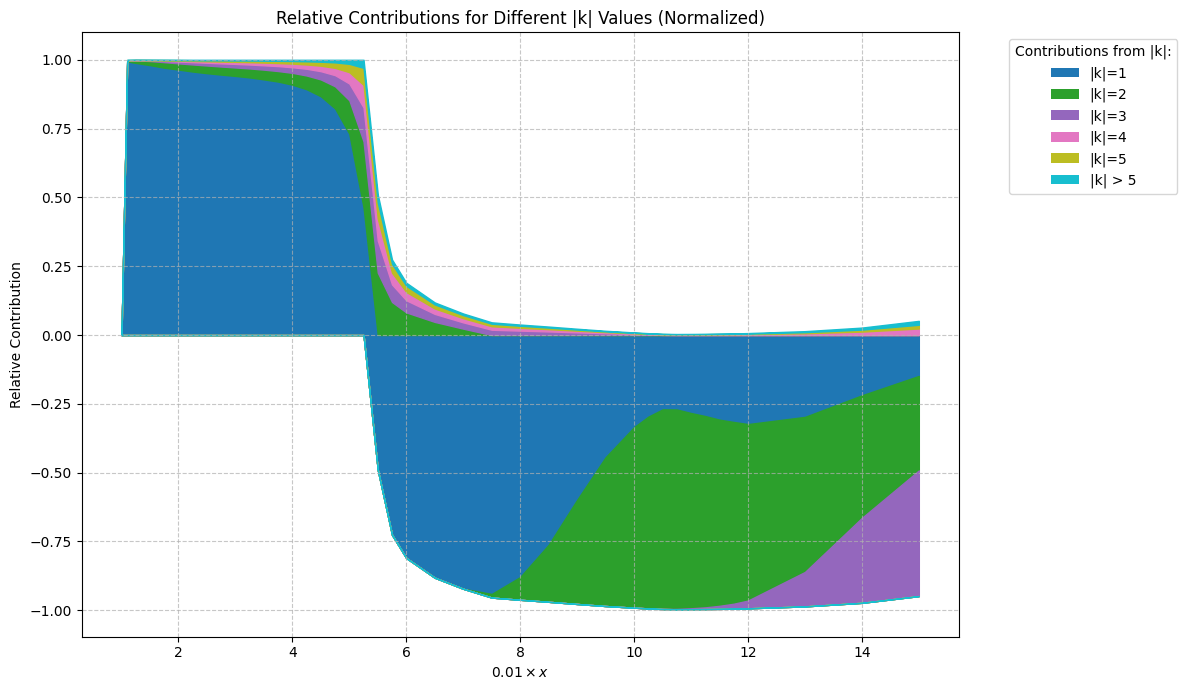

In [398]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming normalized_contributions is of shape (10, N), where N is the number of x_values
# We'll focus on |k| from 1 to 5 and combine the |k| > 5 contributions
kabs_range = np.arange(1, 6)  # |k| = 1 to 5
combined_contribution_idx = np.arange(6, 11)  # |k| > 5

# Colors for different |k| values
colors = plt.cm.tab10(np.linspace(0, 1, len(kabs_range) + 1))  # One extra color for the combined |k| > 5

# Convert x_values to a NumPy array for easier indexing
x_values = np.array([0.01 * int(file.split('_x')[1].split('.fits')[0]) for file in file_list])

plt.figure(figsize=(12, 7))

# Initialize cumulative arrays for positive and negative contributions
positive_cumulative = np.zeros_like(x_values)
negative_cumulative = np.zeros_like(x_values)

# Loop over |k| from 1 to 5
for idx, kabs in enumerate(kabs_range):
    contributions = normalized_contributions[kabs - 1, :]  # Contributions for current |k|
    
    # Separate positive and negative contributions
    positive_contributions = np.where(contributions >= 0, contributions, 0)
    negative_contributions = np.where(contributions < 0, contributions, 0)
    
    # Update cumulative sums
    positive_next = positive_cumulative + positive_contributions
    negative_next = negative_cumulative + negative_contributions
    
    # Plot positive contributions
    plt.fill_between(x_values, positive_cumulative, positive_next, color=colors[idx],
                     label=f'|k|={kabs}' if idx == 0 else '')
    positive_cumulative = positive_next  # Update cumulative
    
    # Plot negative contributions
    plt.fill_between(x_values, negative_cumulative, negative_next, color=colors[idx])
    negative_cumulative = negative_next  # Update cumulative

# Combine all |k| > 5 contributions into one
combined_contributions = np.sum(normalized_contributions[5:, :], axis=0)

# Separate positive and negative contributions for the combined |k| > 5
positive_contributions = np.where(combined_contributions >= 0, combined_contributions, 0)
negative_contributions = np.where(combined_contributions < 0, combined_contributions, 0)

# Update cumulative sums for the combined term
positive_next = positive_cumulative + positive_contributions
negative_next = negative_cumulative + negative_contributions

# Plot combined positive contributions
plt.fill_between(x_values, positive_cumulative, positive_next, color=colors[-1], label='|k| > 5')
positive_cumulative = positive_next  # Update cumulative

# Plot combined negative contributions
plt.fill_between(x_values, negative_cumulative, negative_next, color=colors[-1])
negative_cumulative = negative_next  # Update cumulative

# Create a custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], label=f'|k|={kabs_range[i]}' if i < len(kabs_range) else '|k| > 5') for i in range(len(kabs_range) + 1)]
plt.legend(handles=legend_elements, title='Contributions from |k|:', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel(r'$0.01 \times x$')
plt.ylabel('Relative Contribution')
plt.title('Relative Contributions for Different |k| Values (Normalized)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/var/folders/7b/blysj88j1h171pc8rpnf6d240000gn/T/ipykernel_68017/2732791404.py:18: RuntimeWarning: invalid value encountered in divide
  normalized_contributions_per_term = contributions_per_term / np.sum(np.abs(contributions_per_term))


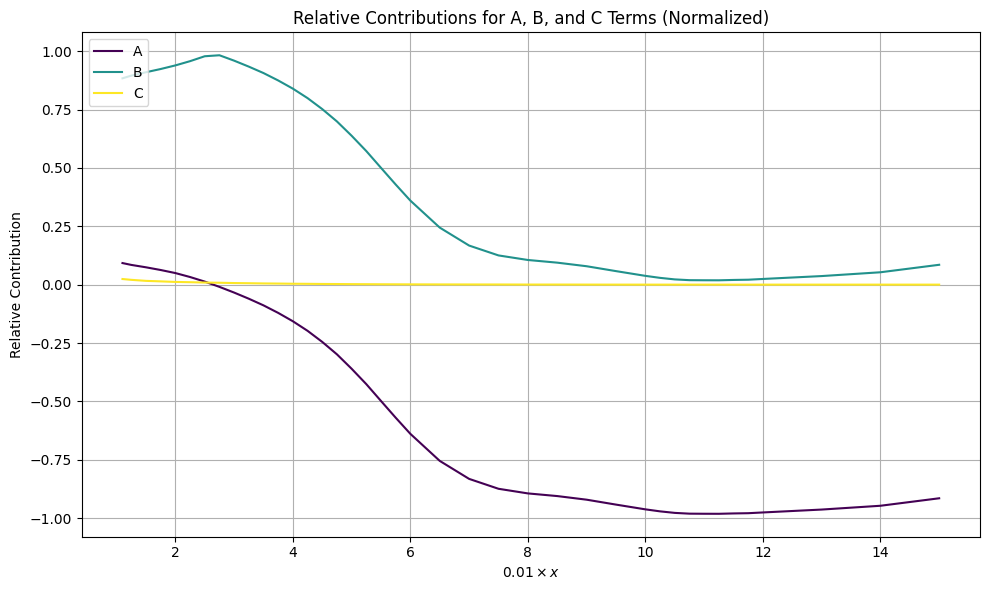

In [388]:
import numpy as np
import matplotlib.pyplot as plt

# List to store the normalized contributions for each file (x value)
normalized_contributions_term = []

# Loop through each file (x value)
for idx, data_array in enumerate(output_x_list):  # Iterate over the 41 files in output_x_list
    contributions_per_term = np.zeros(3)
    # Sum for term A
    contributions_per_term[0] = (np.sum(data_array[:, :, :, :, :8], axis=None)) * domega
    # Sum for term B
    contributions_per_term[1] = (np.sum(data_array[:, :, :, :, 8:15], axis=None)) * domega
    # Sum for term C
    contributions_per_term[2] = (np.sum(data_array[:, :, :, :, 15:], axis=None)) * domega
    
    # Normalize the contributions
    normalized_contributions_per_term = contributions_per_term / np.sum(np.abs(contributions_per_term))
    normalized_contributions_term.append(normalized_contributions_per_term)

# Convert to a NumPy array and transpose it
normalized_contributions_term = np.array(normalized_contributions_term).T

# Now plotting the results
x_values = [0.01 * int(file.split('_x')[1].split('.fits')[0]) for file in file_list]  # Extract x values

# Colors for shading between lines
colors = plt.cm.viridis(np.linspace(0, 1, 3))  # Use colormap for 3 different colors (A, B, and C)

plt.figure(figsize=(10, 6))

# Plot normalized contributions for Term A
plt.plot(x_values, normalized_contributions_term[0], label='A', color=colors[0])

# Plot normalized contributions for Term B
plt.plot(x_values, normalized_contributions_term[1], label='B', color=colors[1])

# Plot normalized contributions for Term C
plt.plot(x_values, normalized_contributions_term[2], label='C', color=colors[2])

# Plot formatting
plt.xlabel(r'$0.01 \times x$')
plt.ylabel('Relative Contribution')
plt.title('Relative Contributions for A, B, and C Terms (Normalized)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/7b/blysj88j1h171pc8rpnf6d240000gn/T/ipykernel_68017/2271132074.py:18: RuntimeWarning: invalid value encountered in divide
  normalized_contributions_per_term = contributions_per_term / np.sum(np.abs(contributions_per_term))


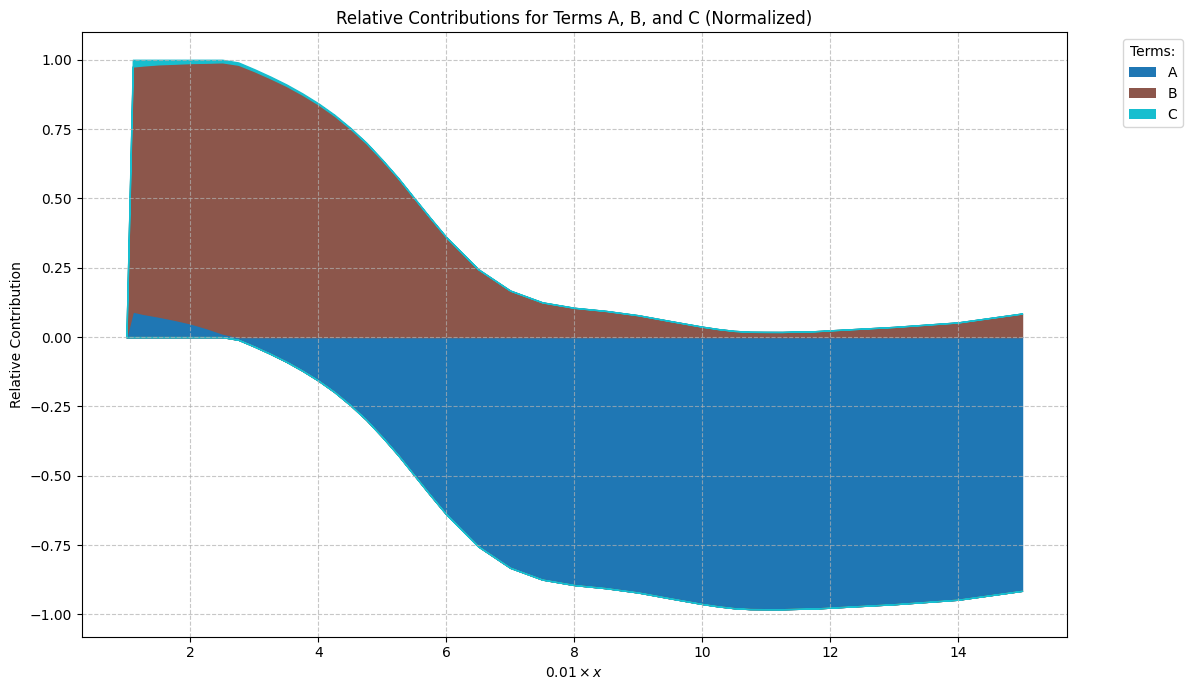

In [391]:
import numpy as np
import matplotlib.pyplot as plt

# List to store the normalized contributions for each file (x value)
normalized_contributions_term = []

# Loop through each file (x value)
for idx, data_array in enumerate(output_x_list):  # Iterate over the 41 files in output_x_list
    contributions_per_term = np.zeros(3)
    # Sum for term A
    contributions_per_term[0] = (np.sum(data_array[:, :, :, :, :8], axis=None)) * domega
    # Sum for term B
    contributions_per_term[1] = (np.sum(data_array[:, :, :, :, 8:15], axis=None)) * domega
    # Sum for term C
    contributions_per_term[2] = (np.sum(data_array[:, :, :, :, 15:], axis=None)) * domega
    
    # Normalize the contributions
    normalized_contributions_per_term = contributions_per_term / np.sum(np.abs(contributions_per_term))
    normalized_contributions_term.append(normalized_contributions_per_term)

# Convert to a NumPy array and transpose it
normalized_contributions_term = np.array(normalized_contributions_term).T

# Now plotting the results
x_values = [0.01 * int(file.split('_x')[1].split('.fits')[0]) for file in file_list]  # Extract x values

# Colors for A, B, and C terms
colors = plt.cm.tab10(np.linspace(0, 1, 3))  # Use colormap for 3 different colors (A, B, and C)

plt.figure(figsize=(12, 7))

# Initialize cumulative arrays for positive and negative contributions
positive_cumulative = np.zeros_like(x_values)
negative_cumulative = np.zeros_like(x_values)

# Loop over the 3 terms (A, B, and C)
for idx, label in enumerate(['A', 'B', 'C']):
    contributions = normalized_contributions_term[idx, :]  # Contributions for current term (A, B, or C)
    
    # Separate positive and negative contributions
    positive_contributions = np.where(contributions >= 0, contributions, 0)
    negative_contributions = np.where(contributions < 0, contributions, 0)
    
    # Update cumulative sums for positive and negative contributions
    positive_next = positive_cumulative + positive_contributions
    negative_next = negative_cumulative + negative_contributions
    
    # Plot positive contributions
    plt.fill_between(x_values, positive_cumulative, positive_next, color=colors[idx], label=f'{label}')
    positive_cumulative = positive_next  # Update cumulative for the next term
    
    # Plot negative contributions
    plt.fill_between(x_values, negative_cumulative, negative_next, color=colors[idx])
    negative_cumulative = negative_next  # Update cumulative for the next term

# Create a custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], label=f'{label}') for i, label in enumerate(['A', 'B', 'C'])]
plt.legend(handles=legend_elements, title='Terms:', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot formatting
plt.xlabel(r'$0.01 \times x$')
plt.ylabel('Relative Contribution')
plt.title('Relative Contributions for Terms A, B, and C (Normalized)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/7b/blysj88j1h171pc8rpnf6d240000gn/T/ipykernel_68017/3686160143.py:16: RuntimeWarning: invalid value encountered in divide
  normalized_contributions_per_termA = contributions_per_termA / np.sum(np.abs(contributions_per_termA))


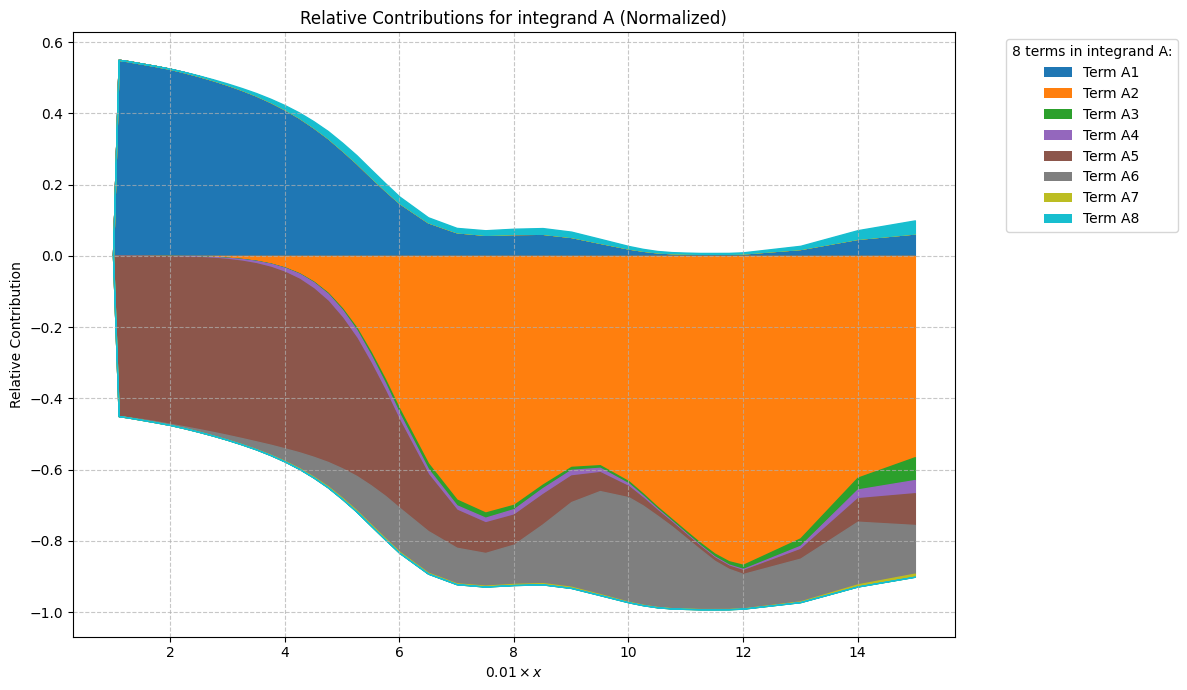

In [393]:
import numpy as np
import matplotlib.pyplot as plt

# List to store the normalized contributions for each file (x value)
normalized_contributions_termA = []

# Loop through each file (x value)
for idx, data_array in enumerate(output_x_list):  # Iterate over the 41 files in output_x_list
    contributions_per_termA = np.zeros(8)  # Adjusted to 8 as per the range 0 to 7
    # Loop over 8 slices (assuming i ranges from 0 to 7)
    for i in range(8):
        # Sum for each slice in term A
        contributions_per_termA[i] = (np.sum(data_array[:, :, :, :, i], axis=None)) * domega
    
    # Normalize the contributions
    normalized_contributions_per_termA = contributions_per_termA / np.sum(np.abs(contributions_per_termA))
    normalized_contributions_termA.append(normalized_contributions_per_termA)

# Convert to a NumPy array and transpose it to match the shape (8, 41)
normalized_contributions_termA = np.array(normalized_contributions_termA).T

# Extract x values (assuming a similar format for file names)
x_values = np.array([0.01 * int(file.split('_x')[1].split('.fits')[0]) for file in file_list])

# Use a colormap for 8 different colors (one for each slice of term A)
colors = plt.cm.tab10(np.linspace(0, 1, 8))

plt.figure(figsize=(12, 7))

# Initialize cumulative arrays for positive and negative contributions
positive_cumulative = np.zeros_like(x_values)
negative_cumulative = np.zeros_like(x_values)

# Loop over the 8 slices of term A
for idx in range(8):
    contributions = normalized_contributions_termA[idx, :]  # Contributions for current slice
    
    # Separate positive and negative contributions
    positive_contributions = np.where(contributions >= 0, contributions, 0)
    negative_contributions = np.where(contributions < 0, contributions, 0)
    
    # Update cumulative sums
    positive_next = positive_cumulative + positive_contributions
    negative_next = negative_cumulative + negative_contributions
    
    # Plot positive contributions
    plt.fill_between(x_values, positive_cumulative, positive_next, color=colors[idx], label=f'Slice {idx}')
    positive_cumulative = positive_next  # Update cumulative
    
    # Plot negative contributions
    plt.fill_between(x_values, negative_cumulative, negative_next, color=colors[idx])
    negative_cumulative = negative_next  # Update cumulative

# Create a custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], label=f'Term A{i+1}') for i in range(8)]
plt.legend(handles=legend_elements, title='8 terms in integrand A:', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot formatting
plt.xlabel(r'$0.01 \times x$')
plt.ylabel('Relative Contribution')
plt.title('Relative Contributions for integrand A (Normalized)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# List to store the normalized contributions for each file (x value)
normalized_contributions_termB = []

# Loop through each file (x value)
for idx, data_array in enumerate(output_x_list):  # Iterate over the 41 files in output_x_list
    contributions_per_termC = np.zeros(8)  # Adjusted to 8 as per the range 0 to 7
    # Loop over 8 slices (assuming i ranges from 0 to 7)
    for i in range(7):
        # Sum for each slice in term A
        contributions_per_termC[i] = (np.sum(data_array[:, :, :, :, i+15], axis=None)) * domega
    
    # Normalize the contributions
    normalized_contributions_per_termC = contributions_per_termC / np.sum(np.abs(contributions_per_termC))
    normalized_contributions_termC.append(normalized_contributions_per_termC)

# Convert to a NumPy array and transpose it to match the shape (8, 41)
normalized_contributions_termC = np.array(normalized_contributions_termC).T

/var/folders/7b/blysj88j1h171pc8rpnf6d240000gn/T/ipykernel_68017/100677423.py:16: RuntimeWarning: invalid value encountered in divide
  normalized_contributions_per_termB = contributions_per_termB / np.sum(np.abs(contributions_per_termB))


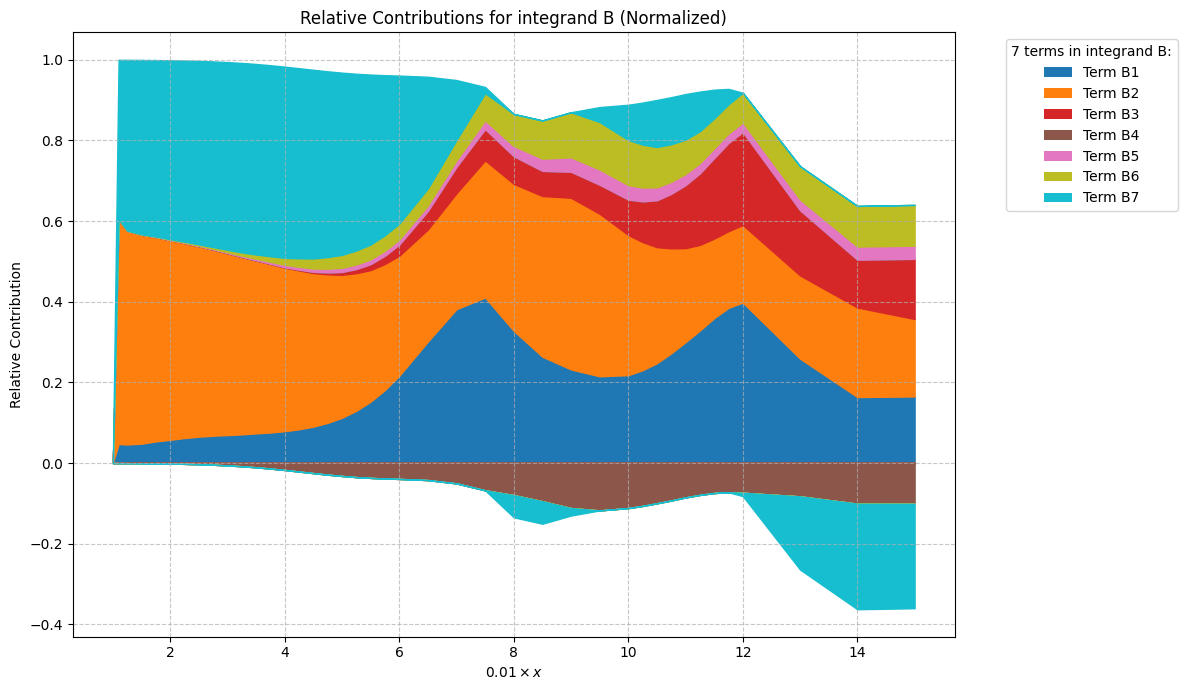

In [399]:
import numpy as np
import matplotlib.pyplot as plt

# List to store the normalized contributions for each file (x value)
normalized_contributions_termB = []

# Loop through each file (x value)
for idx, data_array in enumerate(output_x_list):  # Iterate over the 41 files in output_x_list
    contributions_per_termB = np.zeros(7)  # Adjusted to 7 slices for term B
    # Loop over the 7 slices (assuming i ranges from 0 to 6, starting from index 8)
    for i in range(7):
        # Sum for each slice in term B
        contributions_per_termB[i] = (np.sum(data_array[:, :, :, :, i + 8], axis=None)) * domega
    
    # Normalize the contributions
    normalized_contributions_per_termB = contributions_per_termB / np.sum(np.abs(contributions_per_termB))
    normalized_contributions_termB.append(normalized_contributions_per_termB)

# Convert to a NumPy array and transpose it to match the shape (7, 41)
normalized_contributions_termB = np.array(normalized_contributions_termB).T

# Extract x values (assuming a similar format for file names)
x_values = np.array([0.01 * int(file.split('_x')[1].split('.fits')[0]) for file in file_list])

# Use a colormap for 7 different colors (one for each slice of term B)
colors = plt.cm.tab10(np.linspace(0, 1, 7))

plt.figure(figsize=(12, 7))

# Initialize cumulative arrays for positive and negative contributions
positive_cumulative = np.zeros_like(x_values)
negative_cumulative = np.zeros_like(x_values)

# Loop over the 7 slices of term B
for idx in range(7):
    contributions = normalized_contributions_termB[idx, :]  # Contributions for current slice
    
    # Separate positive and negative contributions
    positive_contributions = np.where(contributions >= 0, contributions, 0)
    negative_contributions = np.where(contributions < 0, contributions, 0)
    
    # Update cumulative sums
    positive_next = positive_cumulative + positive_contributions
    negative_next = negative_cumulative + negative_contributions
    
    # Plot positive contributions
    plt.fill_between(x_values, positive_cumulative, positive_next, color=colors[idx], label=f'Slice {idx}')
    positive_cumulative = positive_next  # Update cumulative
    
    # Plot negative contributions
    plt.fill_between(x_values, negative_cumulative, negative_next, color=colors[idx])
    negative_cumulative = negative_next  # Update cumulative

# Create a custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], label=f'Term B{i+1}') for i in range(7)]
plt.legend(handles=legend_elements, title='7 terms in integrand B:', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot formatting
plt.xlabel(r'$0.01 \times x$')
plt.ylabel('Relative Contribution')
plt.title('Relative Contributions for integrand B (Normalized)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/7b/blysj88j1h171pc8rpnf6d240000gn/T/ipykernel_68017/436738832.py:15: RuntimeWarning: invalid value encountered in divide
  normalized_contributions_per_termC = contributions_per_termC / np.sum(np.abs(contributions_per_termC))


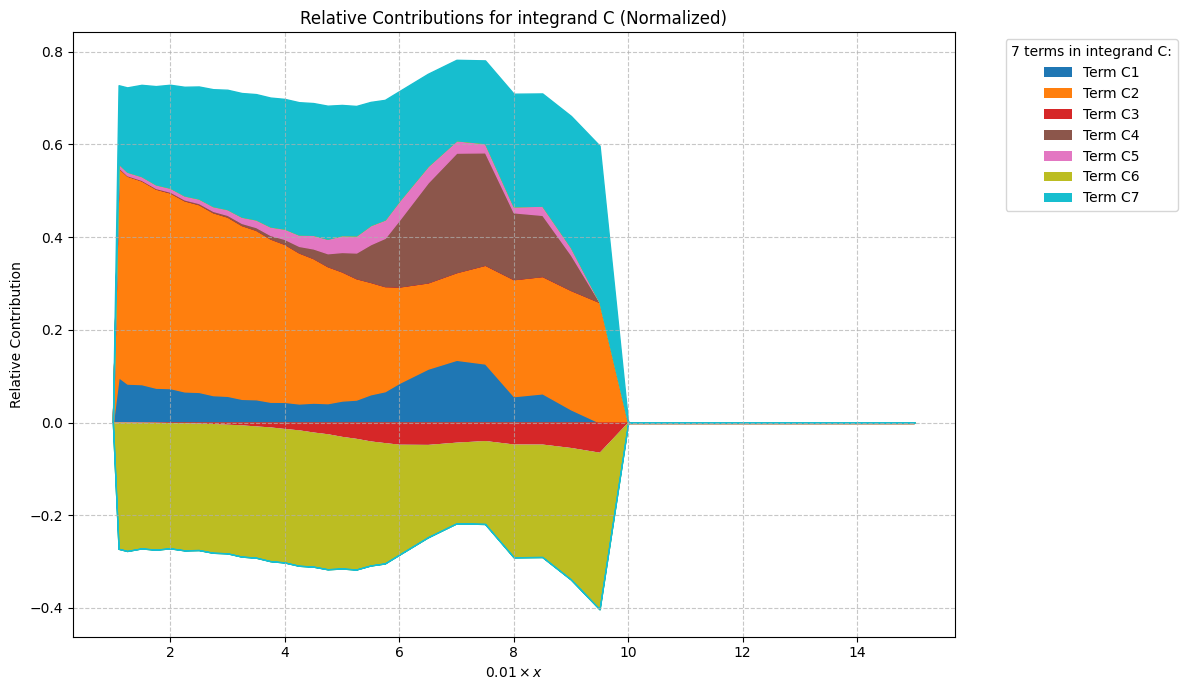

In [402]:
import numpy as np
import matplotlib.pyplot as plt

# List to store the normalized contributions for each file (x value)
normalized_contributions_termC = []

# Loop through each file (x value)
for idx, data_array in enumerate(output_x_list):  # Iterate over the 41 files in output_x_list
    contributions_per_termC = np.zeros(7)  # Adjusted to 7 slices for term C
    # Loop over the 7 slices (assuming i ranges from 0 to 6, starting from index 15)
    for i in range(7):
        # Sum for each slice in term C
        contributions_per_termC[i] = (np.sum(data_array[:, :, :, :, i + 15], axis=None)) * domega
    
    normalized_contributions_per_termC = contributions_per_termC / np.sum(np.abs(contributions_per_termC))
    normalized_contributions_termC.append(normalized_contributions_per_termC)

# Convert to a NumPy array and transpose it to match the shape (7, 41)
normalized_contributions_termC = np.array(normalized_contributions_termC).T

# Extract x values (assuming a similar format for file names)
x_values = np.array([0.01 * int(file.split('_x')[1].split('.fits')[0]) for file in file_list])

# Use a colormap for 7 different colors (one for each slice of term C)
colors = plt.cm.tab10(np.linspace(0, 1, 7))

plt.figure(figsize=(12, 7))

# Initialize cumulative arrays for positive and negative contributions
positive_cumulative = np.zeros_like(x_values)
negative_cumulative = np.zeros_like(x_values)

# Loop over the 7 slices of term C
for idx in range(7):
    contributions = normalized_contributions_termC[idx, :]  # Contributions for current slice
    
    # Separate positive and negative contributions
    positive_contributions = np.where(contributions >= 0, contributions, 0)
    negative_contributions = np.where(contributions < 0, contributions, 0)
    
    # Update cumulative sums
    positive_next = positive_cumulative + positive_contributions
    negative_next = negative_cumulative + negative_contributions
    
    # Plot positive contributions
    plt.fill_between(x_values, positive_cumulative, positive_next, color=colors[idx], label=f'Slice {idx}')
    positive_cumulative = positive_next  # Update cumulative
    
    # Plot negative contributions
    plt.fill_between(x_values, negative_cumulative, negative_next, color=colors[idx])
    negative_cumulative = negative_next  # Update cumulative

# Create a custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], label=f'Term C{i+1}') for i in range(7)]
plt.legend(handles=legend_elements, title='7 terms in integrand C:', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot formatting
plt.xlabel(r'$0.01 \times x$')
plt.ylabel('Relative Contribution')
plt.title('Relative Contributions for integrand C (Normalized)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/7b/blysj88j1h171pc8rpnf6d240000gn/T/ipykernel_68017/3879320472.py:16: RuntimeWarning: invalid value encountered in divide
  normalized_contributions_per_termA = contributions_per_termA / np.sum(np.abs(contributions_per_termA))


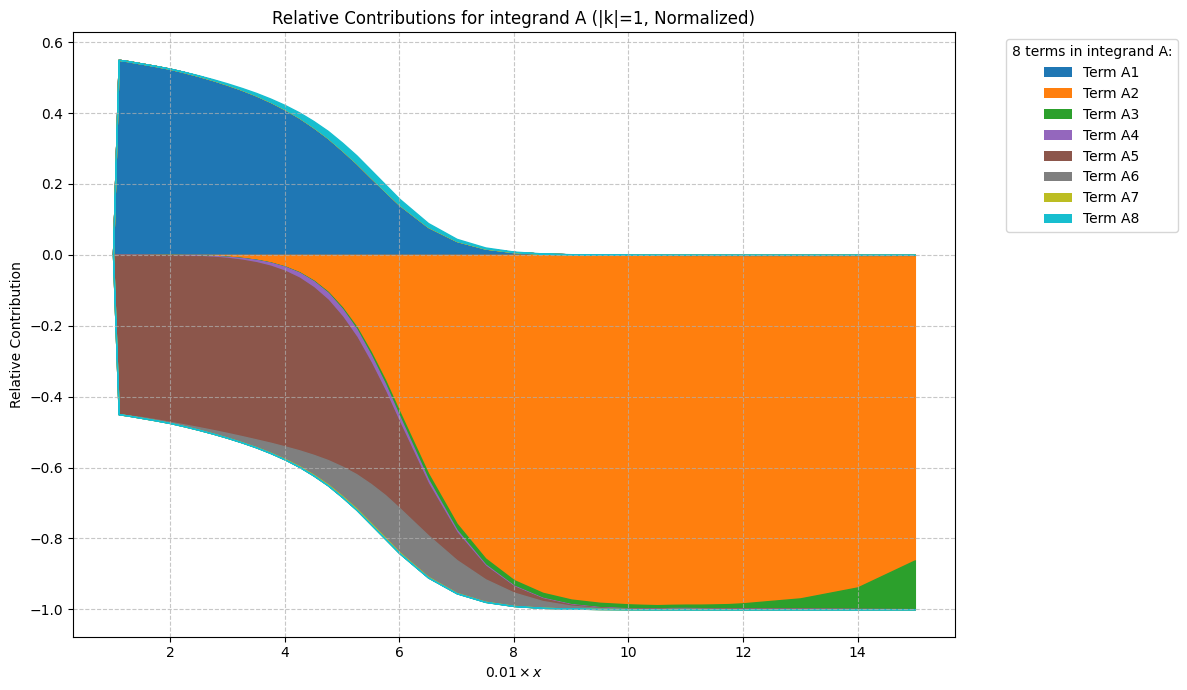

In [403]:
import numpy as np
import matplotlib.pyplot as plt

# List to store the normalized contributions for each file (x value)
normalized_contributions_termA = []

# Loop through each file (x value)
for idx, data_array in enumerate(output_x_list):  # Iterate over the 41 files in output_x_list
    contributions_per_termA = np.zeros(8)  # Adjusted to 8 as per the range 0 to 7
    # Loop over 8 slices (assuming i ranges from 0 to 7)
    for i in range(8):
        # Sum for each slice in term A
        contributions_per_termA[i] = (np.sum(data_array[:, 9, :, :, i], axis=None)+np.sum(data_array[:, 10, :, :, i], axis=None)) * domega
    
    # Normalize the contributions
    normalized_contributions_per_termA = contributions_per_termA / np.sum(np.abs(contributions_per_termA))
    normalized_contributions_termA.append(normalized_contributions_per_termA)

# Convert to a NumPy array and transpose it to match the shape (8, 41)
normalized_contributions_termA = np.array(normalized_contributions_termA).T

# Extract x values (assuming a similar format for file names)
x_values = np.array([0.01 * int(file.split('_x')[1].split('.fits')[0]) for file in file_list])

# Use a colormap for 8 different colors (one for each slice of term A)
colors = plt.cm.tab10(np.linspace(0, 1, 8))

plt.figure(figsize=(12, 7))

# Initialize cumulative arrays for positive and negative contributions
positive_cumulative = np.zeros_like(x_values)
negative_cumulative = np.zeros_like(x_values)

# Loop over the 8 slices of term A
for idx in range(8):
    contributions = normalized_contributions_termA[idx, :]  # Contributions for current slice
    
    # Separate positive and negative contributions
    positive_contributions = np.where(contributions >= 0, contributions, 0)
    negative_contributions = np.where(contributions < 0, contributions, 0)
    
    # Update cumulative sums
    positive_next = positive_cumulative + positive_contributions
    negative_next = negative_cumulative + negative_contributions
    
    # Plot positive contributions
    plt.fill_between(x_values, positive_cumulative, positive_next, color=colors[idx], label=f'Slice {idx}')
    positive_cumulative = positive_next  # Update cumulative
    
    # Plot negative contributions
    plt.fill_between(x_values, negative_cumulative, negative_next, color=colors[idx])
    negative_cumulative = negative_next  # Update cumulative

# Create a custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], label=f'Term A{i+1}') for i in range(8)]
plt.legend(handles=legend_elements, title='8 terms in integrand A:', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot formatting
plt.xlabel(r'$0.01 \times x$')
plt.ylabel('Relative Contribution')
plt.title('Relative Contributions for integrand A (|k|=1, Normalized)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()




/var/folders/7b/blysj88j1h171pc8rpnf6d240000gn/T/ipykernel_68017/448163893.py:16: RuntimeWarning: invalid value encountered in divide
  normalized_contributions_per_termB = contributions_per_termB / np.sum(np.abs(contributions_per_termB))


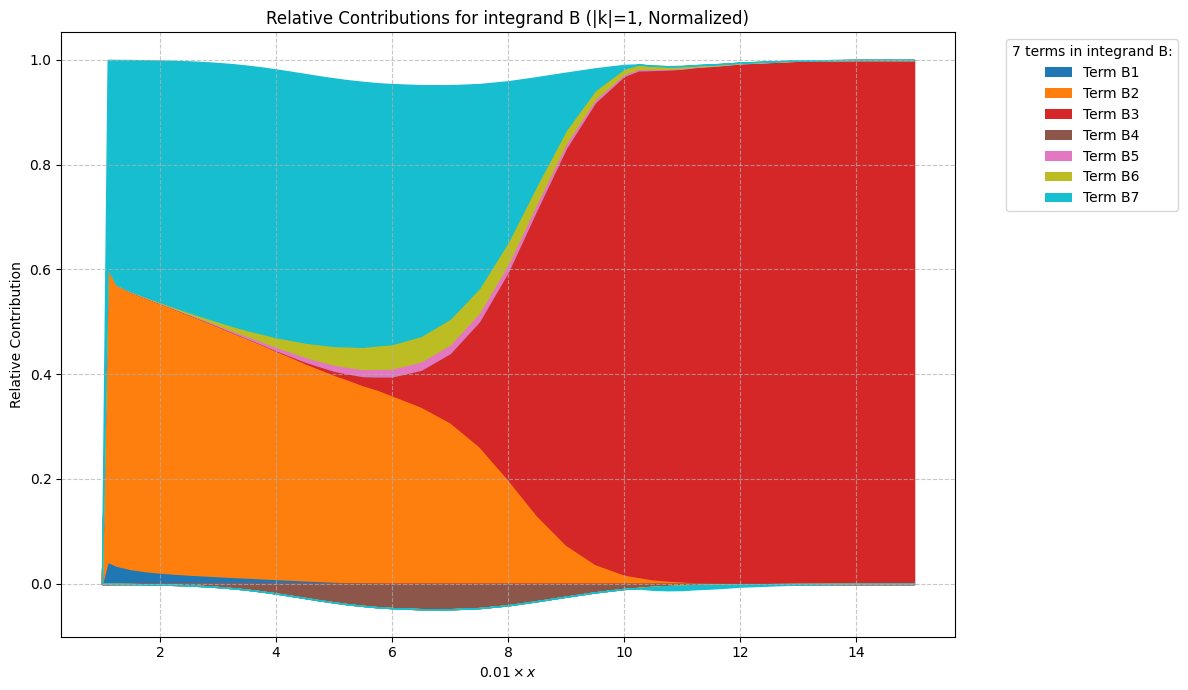

In [406]:
import numpy as np
import matplotlib.pyplot as plt

# List to store the normalized contributions for each file (x value)
normalized_contributions_termB = []

# Loop through each file (x value)
for idx, data_array in enumerate(output_x_list):  # Iterate over the 41 files in output_x_list
    contributions_per_termB = np.zeros(7)  # Adjusted to 7 slices for term B
    # Loop over the 7 slices (assuming i ranges from 0 to 6, starting from index 8)
    for i in range(7):
        # Sum for each slice in term B
        contributions_per_termB[i] = (np.sum(data_array[:, 9, :, :, i + 8], axis=None)+np.sum(data_array[:, 10, :, :, i + 8], axis=None)) * domega
    
    # Normalize the contributions
    normalized_contributions_per_termB = contributions_per_termB / np.sum(np.abs(contributions_per_termB))
    normalized_contributions_termB.append(normalized_contributions_per_termB)

# Convert to a NumPy array and transpose it to match the shape (7, 41)
normalized_contributions_termB = np.array(normalized_contributions_termB).T

# Extract x values (assuming a similar format for file names)
x_values = np.array([0.01 * int(file.split('_x')[1].split('.fits')[0]) for file in file_list])

# Use a colormap for 7 different colors (one for each slice of term B)
colors = plt.cm.tab10(np.linspace(0, 1, 7))

plt.figure(figsize=(12, 7))

# Initialize cumulative arrays for positive and negative contributions
positive_cumulative = np.zeros_like(x_values)
negative_cumulative = np.zeros_like(x_values)

# Loop over the 7 slices of term B
for idx in range(7):
    contributions = normalized_contributions_termB[idx, :]  # Contributions for current slice
    
    # Separate positive and negative contributions
    positive_contributions = np.where(contributions >= 0, contributions, 0)
    negative_contributions = np.where(contributions < 0, contributions, 0)
    
    # Update cumulative sums
    positive_next = positive_cumulative + positive_contributions
    negative_next = negative_cumulative + negative_contributions
    
    # Plot positive contributions
    plt.fill_between(x_values, positive_cumulative, positive_next, color=colors[idx], label=f'Slice {idx}')
    positive_cumulative = positive_next  # Update cumulative
    
    # Plot negative contributions
    plt.fill_between(x_values, negative_cumulative, negative_next, color=colors[idx])
    negative_cumulative = negative_next  # Update cumulative

# Create a custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], label=f'Term B{i+1}') for i in range(7)]
plt.legend(handles=legend_elements, title='7 terms in integrand B:', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot formatting
plt.xlabel(r'$0.01 \times x$')
plt.ylabel('Relative Contribution')
plt.title('Relative Contributions for integrand B (|k|=1, Normalized)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()